<a href="https://colab.research.google.com/github/innovateDotAI/ReadyToUseModels/blob/main/PULSE_GRAPH_V1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SuperCHARGE your complex queries by using Graph Algorithms
To use this notebook (Written in Python) it is assumed that the user has a basic understanding of Graph data algorithms. In case you are looking for a basic understanding of  Graph Data structure and graph traversal methods. For the basic understanding please refer [link](https://www.tutorialspoint.com/graphs-and-its-traversal-algorithms)
This Blog is  written as Jupyter notebooks and run directly in Google Colab—a hosted notebook environment that requires no setup. Click the Run in Google Colab button.

Many time nested queries needs to perform a full scan of database table and search becomes an exponential problem where time complexity to solve become exponential. **To explain this, suppose you have records with relation in billions (N) and you need to scan for a few million (n) .Then Time complexity will be N^n** and this will depends upon the size of n and N. So for big data this will be never ending search.

We can use KD-Tree or AVL tree to reduce the complexity, but these are complex to design and flexibility is also restricted. We can use Breath-fist Search techniques of of Graph to persrom comeplex quries in simplse step. This blog shows one of  such approach where, you have data such that it represent multigraph. In this situation how to apply search techniqures.

**Target Audiance**: Any organization/team who is looking for complex query design where they know the relation of various dimensions of data.

**Prerequsite knowledge**: It is assumed that users of this notebook has a basic idea about BFS search in graph data structure.

**Problem statement**: We need to find how data connected to give node based on the depth level of the graph.

**Desing approach**:
![picture](https://drive.google.com/uc?id=1CrJNivTDPK5qC1BQkKy3Zl2cGYgWRiEW)

# Synthetic data generation
Generating cosmetic data for graphical analysis. You can use any type of data like string or numerical data mixed with special char. #In Case you have own dataset, then need to upload in pandas before executing next cell.

In [ ]:
import numpy as np
import pandas as pd
Pa_ch = np.random.randint(20, size=(200, 2))
Type = np.random.randint(3, size=(200, 1))
df_CI_relation = pd.DataFrame(Pa_ch, columns = ['Parent','Child'])
df_CI_relation['Type'] = pd.DataFrame(Type)

In [ ]:
df_CI_relation.head()

,Parent,Child,Type
0,19,11,0
1,4,0,2
2,18,11,2
3,5,13,0
4,11,13,0


In [ ]:
df_CI_relation.groupby(['Parent']).agg(['count'])

,Child,Type
,count,count
Parent,,
0,8,8
1,10,10
2,11,11
3,11,11
4,9,9
5,12,12
6,9,9
7,6,6


**Let's select seeding parent to start with si 11**

## Varify the Main CI node in relation table

In [ ]:
df_CI_relation[df_CI_relation['Parent'] == 3]

,Parent,Child,Type
25,3,19,0
29,3,14,0
53,3,10,1
84,3,13,1
85,3,3,0
103,3,14,0
112,3,7,1
123,3,5,1
179,3,13,1
183,3,13,1


# NetworkX based anaysis

## Graph Creation based on netowkrx
### Dynamic Disintegration of relationship table based on relations and generating graph of each part.

In [ ]:
import re
import networkx as nx
import matplotlib.pyplot as plt
rel_list = df_CI_relation.Type.unique().tolist()
subGraph_list = []
rel_df = []
gcount=0
for i in rel_list:
    print(i)
    try:
        #df_name = 'df_'+re.sub('[^a-zA-Z0-9 \n]', '_', i).replace(" ","_") # Can be used in case data has mixed char.
        df_name = 'df'+str(i)
        print(df_name)
        globals()[df_name] = df_CI_relation[df_CI_relation['Type'] == i]
        rel_df.append(df_name)
        g = df_name.replace("df","g")
        subGraph_list.append(g)
        nodeRel_dict = globals()[df_name].to_dict('records')
        globals()[g] = nx.MultiDiGraph(graph_lable=i)
        for j in nodeRel_dict:
          globals()[g].add_edge(j['Parent'],j['Child'], relation = j['Type'])
        print("Graph Lable: ",globals()[g].graph)
        print("Total number of nodes: ", int(globals()[g].number_of_nodes()))
        print("Total number of edges: ", int(globals()[g].number_of_edges()))
        gcount = gcount+1
    except:
        pass

print("Total Number of subgraph generated: ",gcount)

0
df0
Graph Lable:  {'graph_lable': 0}
Total number of nodes:  20
Total number of edges:  73
2
df2
Graph Lable:  {'graph_lable': 2}
Total number of nodes:  20
Total number of edges:  63
1
df1
Graph Lable:  {'graph_lable': 1}
Total number of nodes:  20
Total number of edges:  64
Total Number of subgraph generated:  3


## Final subgraph generation based on given depth level

In [ ]:
# This Function module find all children from various subgraphs for giving depth level. 
# We need to pass root Node as a list. This will generate all children recursivelly. # Output will be datafrme at each depth level speratly. This can be accesssed by iterating list "df_nodeList"  
def ParentChildNodes(pa):
  global depth
  global df_nodeList
  while depth > 0:  
    df_list = 'level_'+str(depth)
    df_nodeList.append(df_list)
    depth = depth-1
    globals()[df_list] = []
    chQueue = []
    for parent in pa:
      for graph in subGraph_list:
        try:
          ciEdges = list(nx.bfs_tree(globals()[graph], source=parent,depth_limit=1).edges())
        except:
          ciEdges =[]
        if len(ciEdges) > 0:
          for ed in ciEdges:
            edge_dict = {}
            edge_dict['ParentNode'] = ed[0]
            edge_dict['ChildNode'] = ed[1]
            edge_dict['Type'] = globals()[graph].graph['graph_lable']
            chQueue.append(ed[1])
            globals()[df_list].append(edge_dict)
    #print("Total Child found: ",globals()[df].count())
    #print("New Queue of CI's: ",chQueue)
    #print("Level_list: ",df_list)
    ParentChildNodes(chQueue)
  
  

# Input/Output of Queries

In [ ]:
#Call FM:
#############################################InputStart############################################
depth =2 ##########Upto what level you are looking for data.
CINode = [3] ### Initial Node from where search need to start
#############################################InputEnd############################################
df_nodeList =[]
ParentChildNodes(CINode)
df_subgraph = []
for i in df_nodeList:
    df = 'df'+str(i)
    df_subgraph.append(df)
    globals()[df] = pd.DataFrame(globals()[i])
    display(globals()[df])


,ParentNode,ChildNode,Type
0,3,19,0
1,3,14,0
2,3,10,1
3,3,13,1
4,3,7,1
5,3,5,1


,ParentNode,ChildNode,Type
0,19,11,0
1,19,14,0
2,19,2,0
3,19,7,0
4,19,0,0
5,19,15,0
6,19,0,2
7,19,17,2
8,19,9,2
9,19,11,2


In [ ]:
# combined the dataframes
df_combined = pd.DataFrame(columns=['ChildNode', 'ParentNode', 'Type'])
for i in df_subgraph:
    df_combined = df_combined.append(globals()[i])
df_combined.count()

ChildNode     57
ParentNode    57
Type          57
dtype: int64

# Graph Generation

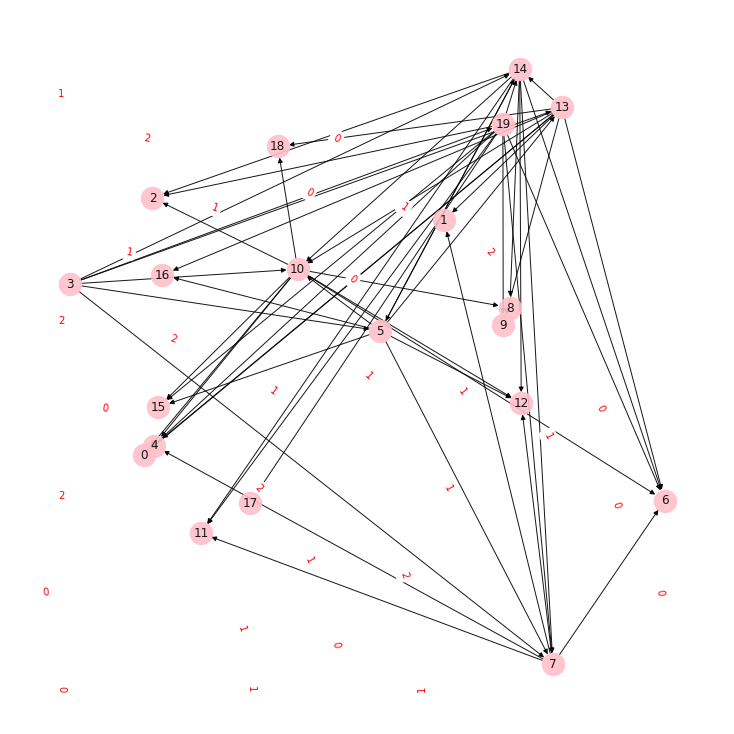

In [ ]:
# Draw the Graph
import matplotlib.pyplot as plt

Node_dict = df_combined.to_dict('records')
edge_lable = {}
for edg in Node_dict:
    nodeTup = (edg['ParentNode'],edg['ChildNode'])
    edge_lable[nodeTup] = edg['Type']
PGraph = nx.MultiDiGraph()
for i in edge_lable:
    PGraph.add_edge(i[0],i[1], relation = edge_lable[i] )
pos = nx.circular_layout(PGraph)
plt.figure(3,figsize=(10,10)) 
nx.draw_random(
    PGraph, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    labels={node: node for node in PGraph.nodes()}
)
  
nx.draw_networkx_edge_labels(
    PGraph,pos,
    edge_labels=edge_lable,
    font_color='red'
)
plt.axis('off')
plt.show()

# Conclustion
When you adopt this method of search then Time complexity become O (N+V) *k where N is no. of nodes and V=no. Of vertices and k= no. of relation. Hence the problem converted from exponential to polynomial time, which will be very fast from exponential search.